In [2]:
%matplotlib inline
import os
import glob
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

/Users/claymcleod/miniconda2/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
dataset = 'mnist'
learning_rates = ['0.125', '0.15', '0.2', '0.3', '0.5']
dfs = {}
for learning_rate in learning_rates:
    files = glob.glob('{}/{}/*.csv'.format(dataset, learning_rate))
    for f in files:
        bn = os.path.basename(f)
        df = pandas.read_csv(f)
        activation = bn.replace(dataset,'').replace(learning_rate,'').replace('-', '').replace('.csv','')     
        df['activation'] = activation
        dfs[activation+'-'+learning_rate] = df
print('The available datasets are:')
for key in dfs.keys():
    print ("  - {}".format(key))

The available datasets are:
  - mrelu-0.5
  - mrelu-0.125
  - mrelu-0.3
  - prelu-0.15
  - prelu-0.125
  - prelu-0.3
  - prelu-0.5
  - mrelut-0.15
  - relu-0.15
  - relu-0.5
  - relu-0.2
  - mrelu-0.15
  - relu-0.3
  - mrelut-0.2
  - mrelut-0.3
  - mrelut-0.125
  - relu-0.125
  - prelu-0.2
  - mrelut-0.5
  - mrelu-0.2


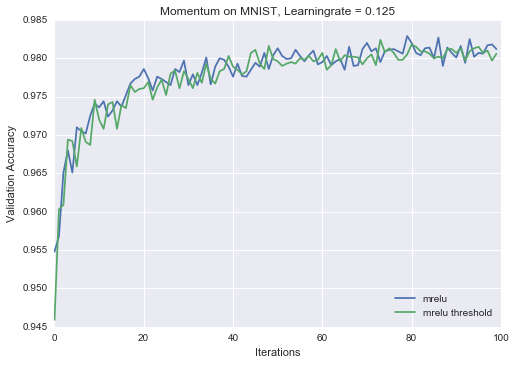

In [29]:
lr = '0.125'
looking_at = 'val_acc'
looking_at_axis = 'Validation Accuracy'

plt.title('Momentum on MNIST, Learningrate = {}'.format(lr))
plt.xlabel('Iterations')
plt.ylabel(looking_at_axis)
mrelu, = plt.plot(dfs['mrelu-{}'.format(lr)].head(100)[looking_at], label='mrelu')
mrelut, = plt.plot(dfs['mrelut-{}'.format(lr)].head(100)[looking_at], label='mrelu threshold')
plt.legend(handles=[mrelu, mrelut], loc=4)

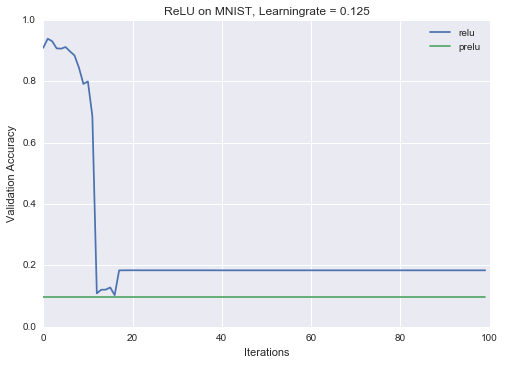

In [24]:
lr = '0.125'
looking_at = 'val_acc'
looking_at_axis = 'Validation Accuracy'

plt.title('ReLU on MNIST, Learningrate = {}'.format(lr))
plt.xlabel('Iterations')
plt.ylabel(looking_at_axis)
relu, = plt.plot(dfs['relu-{}'.format(lr)].head(100)[looking_at], label='relu')
prelu, = plt.plot(dfs['prelu-{}'.format(lr)].head(100)[looking_at], label='prelu')
plt.legend(handles=[relu, prelu], loc=1)

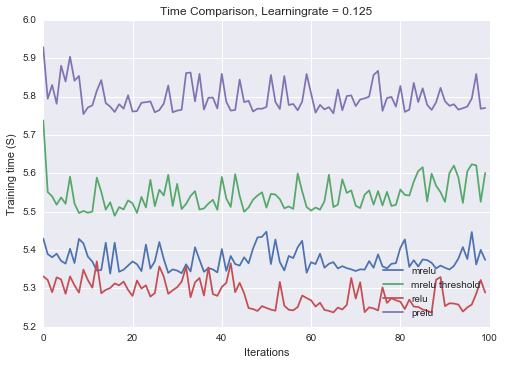

In [30]:
lr = '0.125'
looking_at = 'time'
looking_at_axis = 'Training time (S)'

plt.title('Time Comparison, Learningrate = {}'.format(lr))
plt.xlabel('Iterations')
plt.ylabel(looking_at_axis)
mrelu, = plt.plot(dfs['mrelu-{}'.format(lr)].head(100)[looking_at], label='mrelu')
mrelut, = plt.plot(dfs['mrelut-{}'.format(lr)].head(100)[looking_at], label='mrelu threshold')
relu, = plt.plot(dfs['relu-{}'.format(lr)].head(100)[looking_at], label='relu')
prelu, = plt.plot(dfs['prelu-{}'.format(lr)].head(100)[looking_at], label='prelu')
plt.legend(handles=[mrelu, mrelut, relu, prelu], loc=4)